Title - Classifying MNIST Dataset using CNN.

Data Preprocessing: The MNIST dataset is loaded using mnist.load_data(), providing separate sets for training and testing.
The images are reshaped to have a single channel (grayscale) and normalized to a range between 0 and 1 by dividing by 255.
The labels are one-hot encoded using to_categorical() to represent the target classes.

Model Architecture:The CNN model consists of multiple layers, designed to extract relevant features from the input images and make predictions.
The first layer is a Conv2D layer with 32 filters of size 3x3, using the ReLU activation function. It takes 28x28x1 images as input.
A MaxPooling2D layer follows, which performs downsampling to reduce the spatial dimensions of the feature maps.
Two additional pairs of Conv2D and MaxPooling2D layers are used to further learn hierarchical features from the input.
The final convolutional layers are flattened, and a fully connected layer with 64 neurons and ReLU activation is added.
The output layer consists of 10 neurons (equal to the number of classes), with a softmax activation function for multiclass classification.

Model Compilation and Training: The model is compiled using the "rmsprop" optimizer and "categorical_crossentropy" loss, suitable for multiclass classification problems.
Training is performed on the preprocessed training data for 5 epochs, with a batch size of 64.
The validation data (test_images and test_labels) is used to evaluate the model's performance during training.

Model Evaluation: After training, the model is evaluated on the test data to measure its generalization performance.
The test loss and accuracy are printed to assess how well the model performs on unseen data.

Visualization of Training Metrics: The training and validation loss values are plotted against the number of epochs to visualize how the model's performance changes during training.
Similarly, the training and validation accuracy are plotted to observe the model's learning progress.

Random Image Prediction: A random image from the test set is chosen and used to make predictions.
The image is preprocessed similarly to the training data (reshaped and normalized) and then passed through the trained model to obtain the predicted class.
The true class label of the image and the model's predicted class label are displayed, along with the image itself.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images.reshape(-1,28,28,1), train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 71s 74ms/step - loss: 0.1772 - accuracy: 0.9446 - val_loss: 0.0885 - val_accuracy: 0.9718
Epoch 2/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0475 - accuracy: 0.9855 - val_loss: 0.0380 - val_accuracy: 0.9876
Epoch 3/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0325 - accuracy: 0.9906 - val_loss: 0.0270 - val_accuracy: 0.9908
Epoch 4/5
938/938 [==============================] - 60s 64ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.0321 - val_accuracy: 0.9910
Epoch 5/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0199 - accuracy: 0.9941 - val_loss: 0.0363 - val_accuracy: 0.9903


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0363 - accuracy: 0.9903
Test loss: 0.036252461373806
Test accuracy: 0.9902999997138977


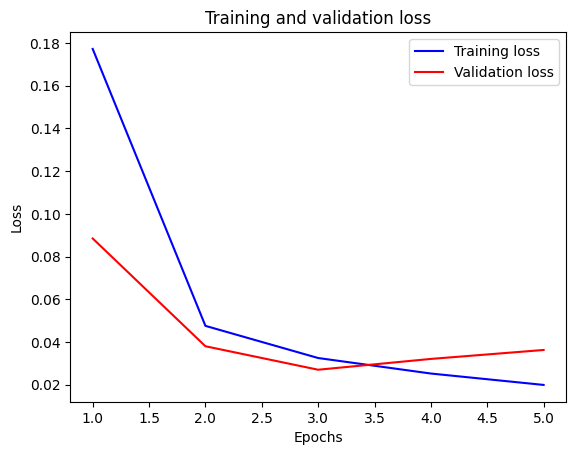

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b-', label='Training loss')
plt.plot(epochs, val_loss_values, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

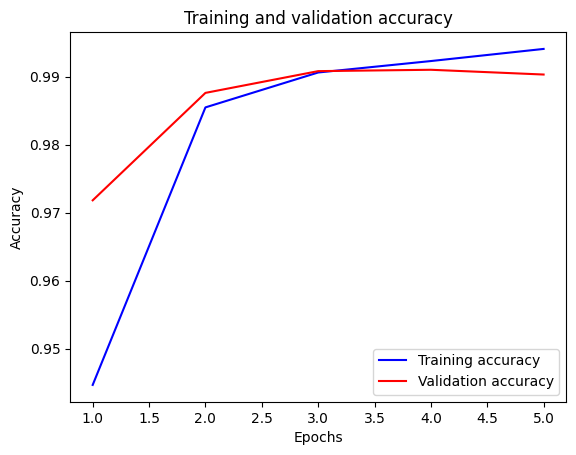

In [ ]:
# Plot training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Choose a random image from test data
idx = np.random.randint(test_images.shape[0])
x = test_images[idx]
y_true = np.argmax(test_images[idx])

In [ ]:
# Reshape and normalize the input image
x = x.reshape(1,28,28,1).astype('float32') / 255

# Make predictions on the input image
y_pred = model.predict(x)
y_pred = np.argmax(y_pred)

1/1 [==============================] - 0s 24ms/step


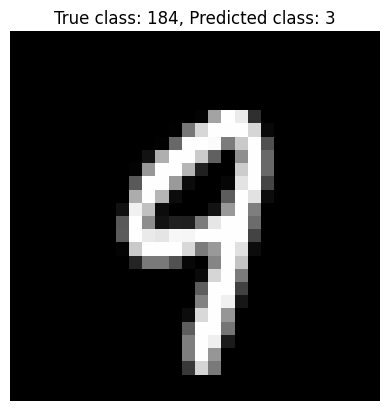

In [ ]:
# Plot the input image and predicted class
plt.imshow(test_images[idx], cmap='gray')
plt.title('True class: %d, Predicted class: %d' % (y_true, y_pred))
plt.axis('off')
plt.show()